<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/ANN_with_Regularization_Australia_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date              True
Location          True
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-nu

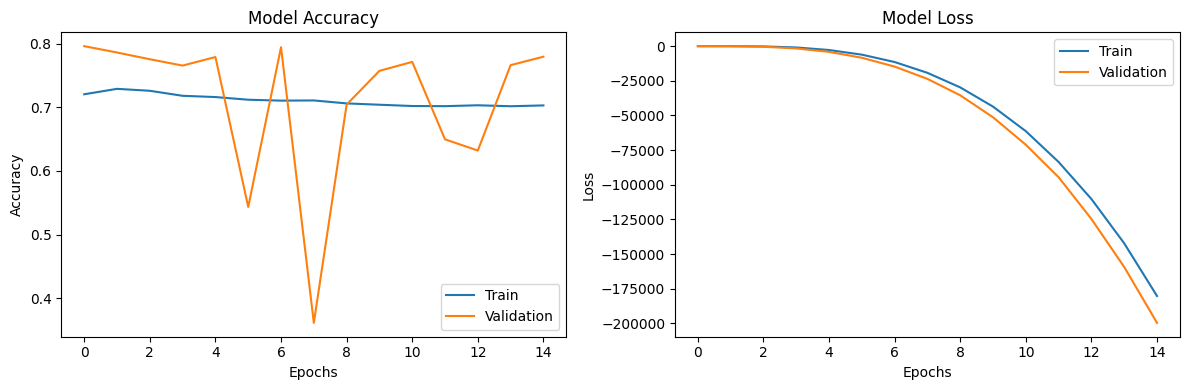

Epoch 1/100
3637/3637 [==============================] - 6s 1ms/step - loss: 3.9857 - accuracy: 0.7397 - val_loss: 0.8238 - val_accuracy: 0.7590
Epoch 2/100
3637/3637 [==============================] - 6s 2ms/step - loss: 0.7339 - accuracy: 0.7577 - val_loss: 0.6513 - val_accuracy: 0.7590
Epoch 3/100
3637/3637 [==============================] - 6s 2ms/step - loss: 0.6137 - accuracy: 0.7581 - val_loss: 0.5860 - val_accuracy: 0.7590
Epoch 4/100
3637/3637 [==============================] - 6s 2ms/step - loss: 0.5828 - accuracy: 0.7582 - val_loss: 0.5775 - val_accuracy: 0.7590
Epoch 5/100
3637/3637 [==============================] - 6s 2ms/step - loss: 0.5778 - accuracy: 0.7582 - val_loss: 0.5764 - val_accuracy: 0.7590
Epoch 6/100
3637/3637 [==============================] - 6s 2ms/step - loss: 0.5775 - accuracy: 0.7582 - val_loss: 0.5765 - val_accuracy: 0.7590
Epoch 7/100
3637/3637 [==============================] - 5s 1ms/step - loss: 0.5775 - accuracy: 0.7582 - val_loss: 0.5765 - val_ac

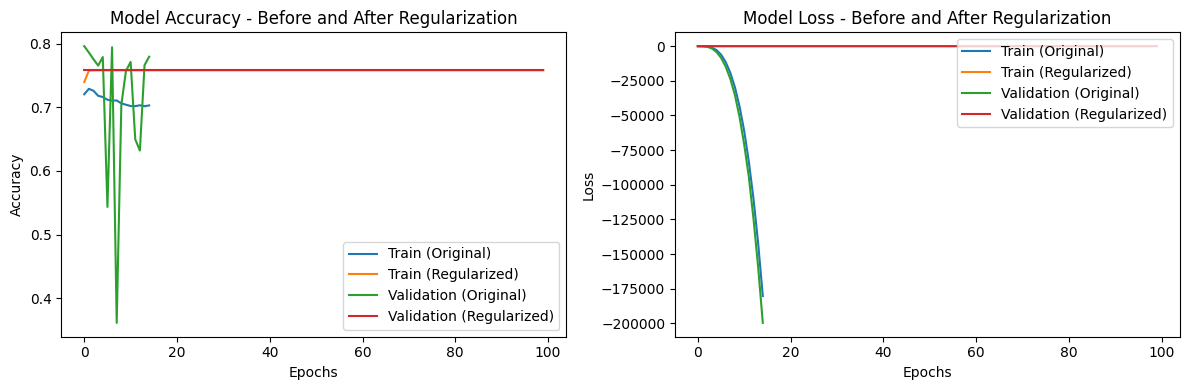

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Step 1: Load and pre-process the data
data = pd.read_csv('/content/weatherAUS.csv')

def nullvalues(data):
    for i in data.columns:
        if data[i].dtypes =='object':
            data[i] = data[i].fillna('unknown')
        else :
            data[i] = data[i].fillna(0)
    return data

nullvalues(data)

s = (data.dtypes == "object" )
object_cols = list(s[s].index)# Apply label encoder to each column with categorical data
print(s)

data['WindDir9am']

data.info()

data['WindGustDir'] = data['WindGustDir'].astype(str)
data['WindDir9am'] = data['WindDir9am'].astype(str)
data['RainToday'] = data['RainToday'].astype(str)
data['RainTomorrow'] = data['RainTomorrow'].astype(str)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in object_cols:

    data[i] = label_encoder.fit_transform(data[i])

data.head()

label_encoder = LabelEncoder()
for i in object_cols:
    print(i)
    data[i] = label_encoder.fit_transform(data[i])

X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

col_names = list(X.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(X)
features = pd.DataFrame(X, columns=col_names)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2)
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)


# Step 2: Build an ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

# Step 5: Plot accuracy and loss for training and validation dataset
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Step 6: Implement regularization techniques and analyze performance
model_reg = Sequential()
model_reg.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(1, activation='sigmoid'))

model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Compare the performance before and after regularization
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history_reg.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_reg.history['val_accuracy'])
plt.title('Model Accuracy - Before and After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train (Original)', 'Train (Regularized)', 'Validation (Original)', 'Validation (Regularized)'],
           loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history_reg.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Model Loss - Before and After Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train (Original)', 'Train (Regularized)', 'Validation (Original)', 'Validation (Regularized)'],
           loc='upper right')
plt.tight_layout()
plt.show()
